In [1]:
small_font_size = 5
base_font_size = 7
large_font_size = 7
# figsize = (4, 4)
c0, c1, c2, c3 = ['black', 'forestgreen', 'royalblue', 'red' ]

In [2]:
fn = './confusion_matrix_epoch0.csv' # rows are expected, columns are predicted, 0 means unrelated

In [3]:
# Nature style
import matplotlib.pyplot as plt

fontsize = 7
capsize = 1.5
plt.rcParams.update({
    # Figure size and DPI
    'figure.dpi': 300, # High DPI for initial saving
    'savefig.dpi': 300, # High DPI for output file
    'savefig.bbox': 'tight', # Removes excess white space around figure
    'savefig.transparent': True, # Make the background transparent
    
    # Font settings
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial', 'Helvetica'], # Use Helvetica or Arial
    'pdf.fonttype': 42,
    # size: 5-7 
    'font.size': fontsize, # Base size. Axes labels will be this size.
    'axes.titlesize': fontsize, # Size of the axes title
    'axes.labelsize': fontsize, # Size of the x and y labels
    'xtick.labelsize': fontsize, # Size of the x-tick labels
    'ytick.labelsize': fontsize, # Size of the y-tick labels
    'legend.fontsize': fontsize, # Size of the legend text
    
    # Line settings
    'lines.linewidth': .5,
    'lines.markersize': 2,
    
    # Axes settings
    'axes.linewidth': 0.5, # Width of the axes border
    'xtick.major.width': 0.5, # Width of the x-tick lines
    'ytick.major.width': 0.5, # Width of the y-tick lines
    'xtick.major.size': 3, # Length of the x-ticks
    'ytick.major.size': 3, # Length of the y-ticks
    
    # Other settings
    'legend.frameon': False, # Remove the box around the legend
    'legend.handlelength': 1.5, # Length of the legend lines
})

# Define the WIDTH of your figure in inches (Single column: 89 mm, double column: 183 mm, max height: 170 mm)
width_in_inches = 85/25.4 # 85 mm
height_in_inches = 85/25.4 # 85 mm
figsize=(width_in_inches, height_in_inches)

In [4]:
import seaborn as sns
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv(fn,header=None)
print(df.shape)
df.head()

(13, 13)


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,8.125,0.000000,0.000000,0.000000,0.000000,0.022321,0.066964,0.200893,0.223214,0.089286,0.044643,0.0,0.0
1,0.000,12.991071,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2,0.000,0.000000,10.625000,0.446429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
3,0.000,0.000000,0.446429,9.665179,1.584821,0.022321,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
4,0.000,0.000000,0.000000,1.473214,7.165179,1.629464,0.223214,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [6]:
# convert dataframe to array
arr = df.values
print(arr[:5,:5])
print(arr.shape)

[[ 8.125       0.          0.          0.          0.        ]
 [ 0.         12.99107143  0.          0.          0.        ]
 [ 0.          0.         10.625       0.44642857  0.        ]
 [ 0.          0.          0.44642857  9.66517857  1.58482143]
 [ 0.          0.          0.          1.47321429  7.16517857]]
(13, 13)


In [7]:
# plot confusion matrix
def plot_confusion_matrix(conf_mat, labels=None):
    if labels is None:
        labels = range(conf_mat.shape[0])
    plt.figure(figsize=figsize)
    # Create annotation array: show value if nonzero, else empty string
    conf_mat = np.round(conf_mat).astype(int)
    annot = np.where(conf_mat != 0, conf_mat.astype(str), "")
    sns.heatmap(conf_mat, annot=annot, cmap='Blues', cbar=False, 
                xticklabels=labels, yticklabels=labels, fmt='', annot_kws={"size": base_font_size})
    # plt.title('Kinship', fontsize=large_font_size)
    plt.xlabel('Predicted (%)', fontsize=large_font_size)
    plt.ylabel('Expected (%)', fontsize=large_font_size)
    plt.tight_layout()
    plt.savefig('confusion_matrix.pdf', bbox_inches='tight')
    plt.show()
    plt.close()

def plot_confusion_matrix_with_bubbles(conf_mat):
    # rows are expected, columns are predicted
    # normalize by total
    total = conf_mat.flatten().sum()
    conf_mat = conf_mat / total * 100
    # Calculate accuracy by summing diagonal elements (correct predictions) and dividing by total
    accuracy = np.sum(np.diag(conf_mat)) / 100

    # normalize by the sum of each row 
    conf_mat = conf_mat / conf_mat.sum(axis=1, keepdims=True) * 100

    # transpose the confusion matrix, so that rows are predicted and columns are expected
    conf_mat = conf_mat.T

    plt.figure(figsize=figsize)
    
    # Set up the plot
    n_classes = conf_mat.shape[0]
    x, y = np.meshgrid(np.arange(n_classes), np.arange(n_classes))
    
    # Scale bubble sizes - multiply by some factor to make bubbles visible but not overlapping
    sizes = conf_mat.flatten() * 2

    # replace 0 to n_classes
    x[x == 0] = n_classes
    y[y == 0] = n_classes

    plt.scatter(x.flatten(), y.flatten(), s=sizes.flatten(), alpha=1, c='black', edgecolors='black', linewidths=0)
    
    plt.xlabel('True degree', fontsize=large_font_size)
    plt.ylabel('Predicted', fontsize=large_font_size)
    # plt.title(f"Confusion Matrix - accuracy {accuracy:.3f}", fontsize=20)
    
    # Set integer ticks
    ticks = np.arange(1,n_classes+1)
    tick_labels = [f'{i}' for i in ticks]
    tick_labels[-1] = 'UN'
    plt.xticks(ticks, tick_labels, fontsize=base_font_size)
    plt.yticks(ticks, tick_labels, fontsize=base_font_size)
    
    # # Add text annotations to show the values
    # for i in range(n_classes):
    #     for j in range(n_classes):
    #         plt.text(j, i, f"{conf_mat[i, j]:.0f}", ha='center', va='center', color='gray', fontsize=12) if conf_mat[i, j] > 20 else None
    
    # Add gridlines to make it easier to read
    plt.grid(True, linestyle='--', alpha=0.1)
    
    # expand the xlim and ylim so that the bubbles are not cut off
    plt.xlim(0, n_classes+1)
    plt.ylim(0, n_classes+1)
    plt.tight_layout()
    plt.savefig('confusion_matrix_with_bubbles.pdf', bbox_inches='tight')
    plt.show()
    plt.close()


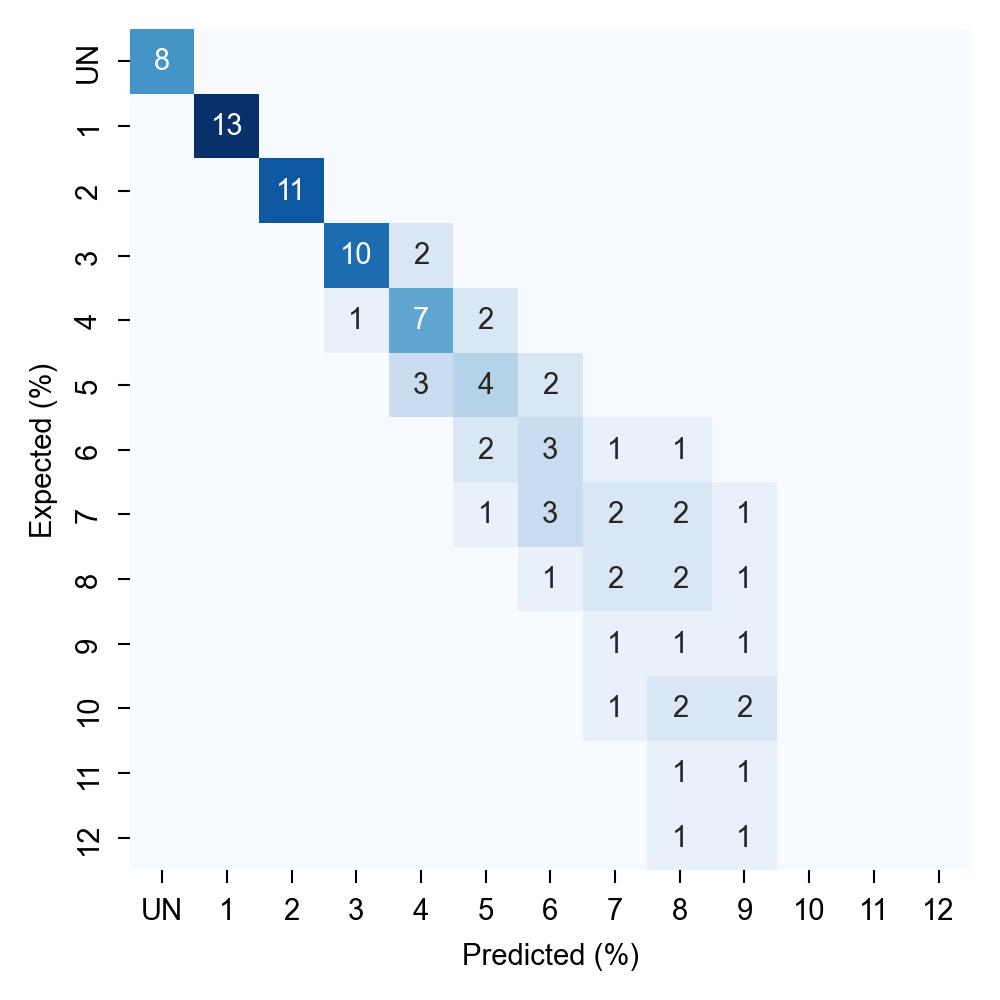

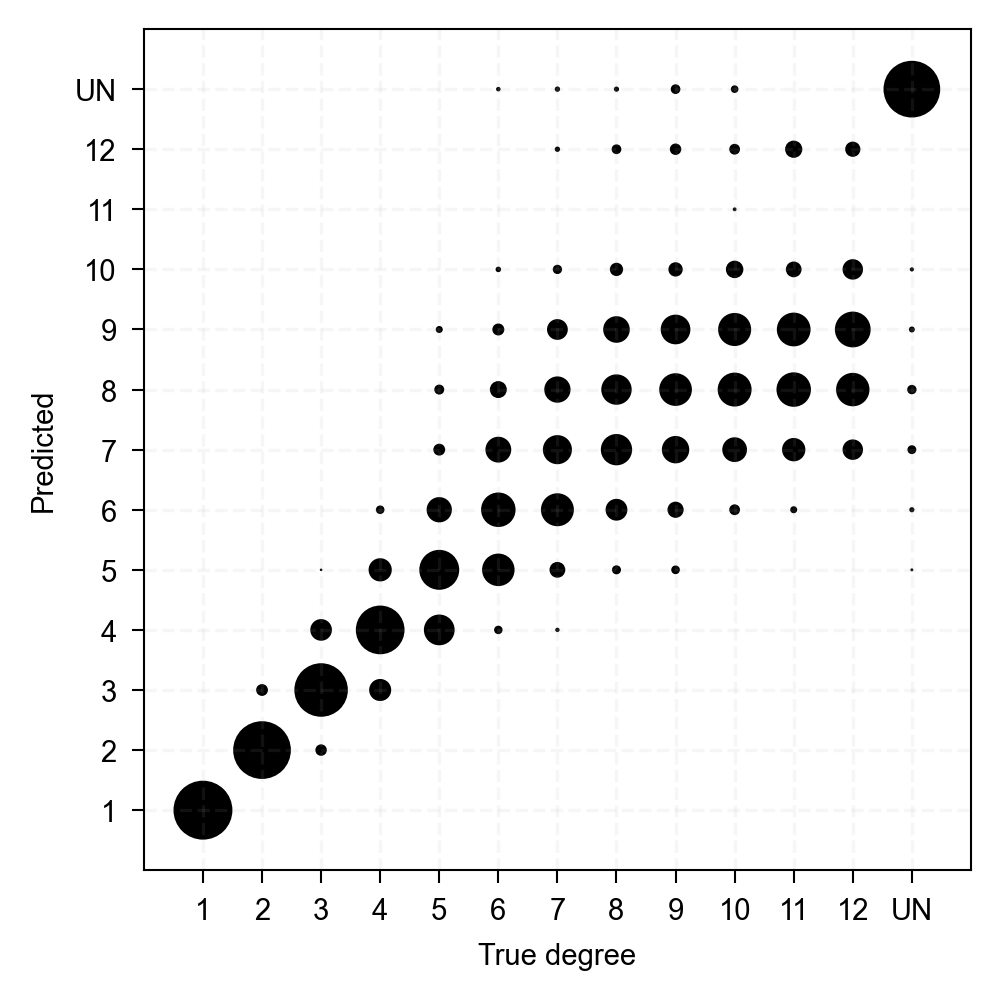

In [8]:
labels = list(range(arr.shape[0]))
labels[0] = 'UN'
plot_confusion_matrix(arr, labels)

plot_confusion_matrix_with_bubbles(arr)

In [9]:
# get a figure similar to Bonsai paper
# from a confusion matrix in which rows are expected integers, columns are predicted integers, get the fraction of accurate predictions within an error range (e.g. +-1) for each expected integer.
def accuracy_within_error_range(confusion_matrix, error_range=1):
    """
    Calculate the fraction of predictions within ±error_range for each expected class.
    
    Args:
        confusion_matrix (numpy.ndarray): Square confusion matrix where rows are expected
                                         and columns are predicted classes.
        error_range (int): The acceptable error range (±value).
    
    Returns:
        dict: A dictionary mapping each class to its accuracy within the error range.
    """
    num_classes = confusion_matrix.shape[0]
    results = {}
    
    for expected in range(1, num_classes):
        total_predictions = np.sum(confusion_matrix[expected, :])
        if total_predictions == 0:
            results[expected] = 0.0
            continue
            
        # Get indices of predictions within the error range
        lower_bound = max(1, expected - error_range)      # 0 is unrelated, therefore 1 is the first acceptable class !!!!!!
        upper_bound = min(num_classes - 1, expected + error_range) # num_classes - 1 is the last acceptable class !!!!!!
        correct_predictions = np.sum(confusion_matrix[expected, lower_bound:upper_bound+1])
        
        accuracy = correct_predictions / total_predictions * 100
        results[expected] = accuracy
    
    return results



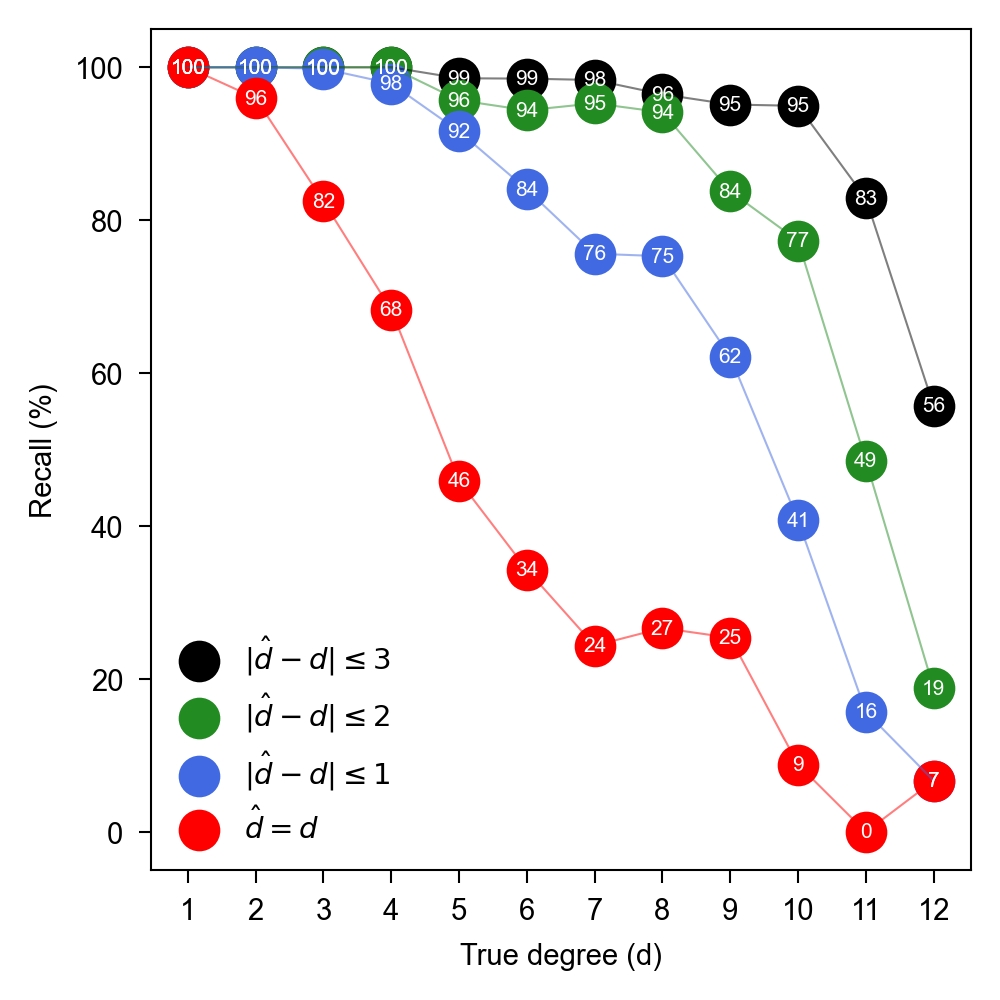

In [10]:

results0 = accuracy_within_error_range(arr, 0)
results1 = accuracy_within_error_range(arr, 1)
results2 = accuracy_within_error_range(arr, 2)
results3 = accuracy_within_error_range(arr, 3)

# plot results with bigger markers and values inside the marker
plt.figure(figsize=figsize)

x = list(results0.keys())
y0 = list(results0.values())
y1 = list(results1.values())
y2 = list(results2.values())
y3 = list(results3.values())

# Use scatter for bigger markers
plt.scatter(x, y3, label=r'$|\hat{d} - d| \leq 3$', marker='o', s=100, color=c0, edgecolors=c0, linewidths=0, alpha=1)
plt.scatter(x, y2, label=r'$|\hat{d} - d| \leq 2$', marker='o', s=100, color=c1, edgecolors=c1, linewidths=0, alpha=1)
plt.scatter(x, y1, label=r'$|\hat{d} - d| \leq 1$', marker='o', s=100, color=c2, edgecolors=c2, linewidths=0, alpha=1)
plt.scatter(x, y0, label=r'$\hat{d} = d$', marker='o', s=100, color=c3, edgecolors=c3, linewidths=0, alpha=1)

# Plot lines for visual clarity
plt.plot(x, y3, alpha=0.5, color=c0)
plt.plot(x, y2, alpha=0.5, color=c1)
plt.plot(x, y1, alpha=0.5, color=c2)
plt.plot(x, y0, alpha=0.5, color=c3)

# Annotate values inside the markers
for i, val in enumerate(y0):
    v = int(np.round(val, 0))
    plt.text(x[i], val, v, ha='center', va='center', color='white', fontsize=small_font_size)
for i, val in enumerate(y1):
    v = int(np.round(val, 0))
    plt.text(x[i], val, v, ha='center', va='center', color='white', fontsize=small_font_size)
for i, val in enumerate(y2):
    v = int(np.round(val, 0))
    plt.text(x[i], val, v, ha='center', va='center', color='white', fontsize=small_font_size)
for i, val in enumerate(y3):
    v = int(np.round(val, 0))
    plt.text(x[i], val, v, ha='center', va='center', color='white', fontsize=small_font_size)

plt.legend()
plt.xlabel('True degree (d)', fontsize=large_font_size)
plt.ylabel('Recall (%)', fontsize=large_font_size)
# plt.title('Kinship predictions within error range', fontsize=large_font_size)
plt.xticks(x)  # plot all labels on x ticks
plt.tight_layout()
plt.savefig('Kinship_accuracy_within_error_range.pdf', bbox_inches='tight')
plt.show()
plt.close()

/tmp/ipykernel_2722964/1036259825.py:11: RuntimeWarning: invalid value encountered in scalar divide
  f1 = 2*precision*recall/(precision+recall)


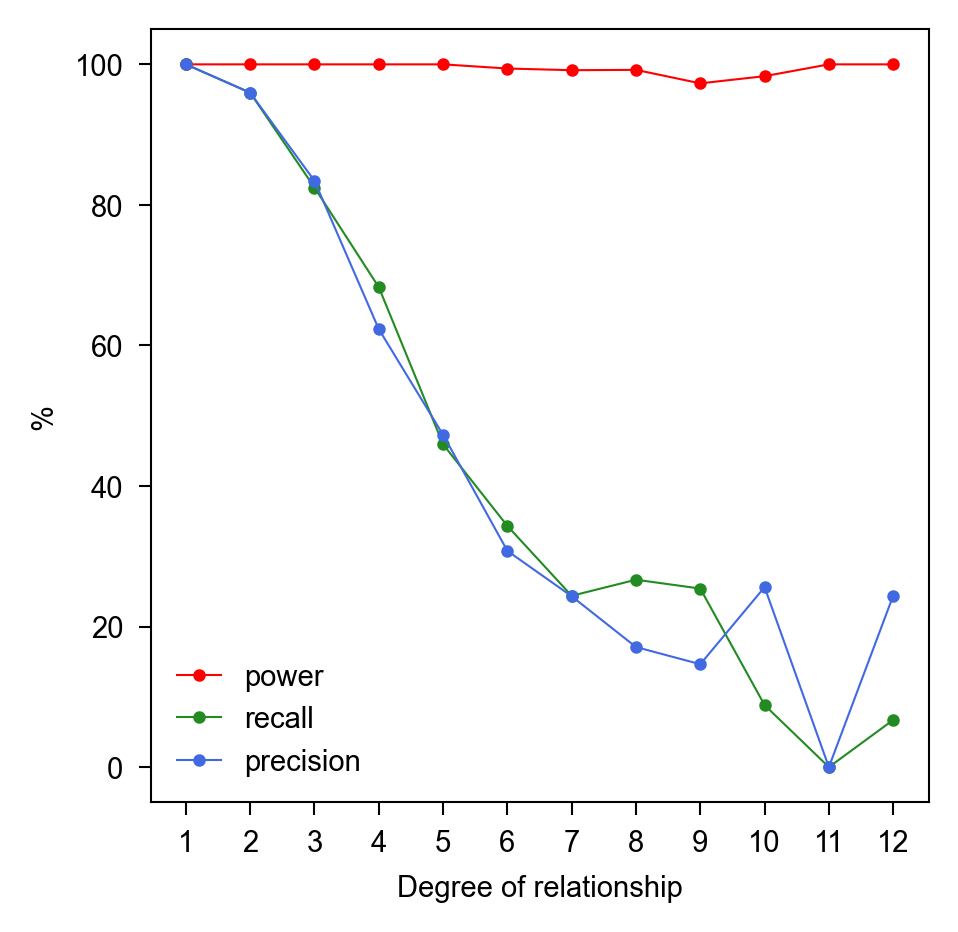

In [11]:
def get_power(df, degree=0):
    # power: among the expected positives (related), how many are predicted related
    # rows are expected, columns are predicted
    expected_pos = df.iloc[degree, :].sum()
    predicted_pos = df.iloc[:, degree].sum()
    true_pos = df.iloc[degree, degree]
    predicted_unrelated = df.iloc[degree, 0].sum()
    power = 1 - (predicted_unrelated/expected_pos)
    recall = true_pos/expected_pos
    precision = true_pos/predicted_pos
    f1 = 2*precision*recall/(precision+recall)
    return power*100, recall*100, precision*100, f1*100

degrees = range(1,13)
powers = []
recalls = []
precisions = []
f1s = []
for degree in degrees:
    p, r, pr, f1 = get_power(df, degree)
    powers.append(p)
    recalls.append(r)
    precisions.append(pr)
    f1s.append(f1)

# plot power and sensitivity
import matplotlib.pyplot as plt
plt.figure(figsize=figsize)
plt.plot(degrees, powers, label='power', marker='o', color=c3, alpha=1)
plt.plot(degrees, recalls, label='recall', marker='o', color=c1, alpha=1)
plt.plot(degrees, precisions, label='precision', marker='o', color=c2, alpha=1)
# plt.plot(degrees, f1s, label='f1', marker='o')
plt.legend(fontsize=fontsize)
plt.xlabel('Degree of relationship', fontsize=fontsize)
plt.ylabel('%', fontsize=fontsize)
plt.xticks(degrees, fontsize=fontsize)  # Show all degree values on x-axis
plt.yticks(fontsize=fontsize)
plt.show()
plt.close()